# Support Vectro Regression (SVR)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X= dataset.iloc[:, 1:2].values
y=dataset.iloc[:, -1].values

In [4]:
y= y.reshape(len(y),1)   # y have to reshape for feature scallinbg

In [5]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler= StandardScaler()
y_scaler= StandardScaler()
X= X_scaler.fit_transform(X)
y= y_scaler.fit_transform(y)   #not only fiting but also transforming

In [7]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [8]:
# Svr regression
""" In SVR feature scalling does not work automatically so we should implement it"""
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')     #has many parameter like rbf or gausian so have to define it
regressor.fit(X,y)

C:\Users\gazur\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred=y_scaler.inverse_transform(regressor.predict(X_scaler.transform([[6.5]])))
y_pred
# y_scaler.inverse_transform(regressor.predict(X_scaler.transform([[6.5]])))

array([170370.0204065])

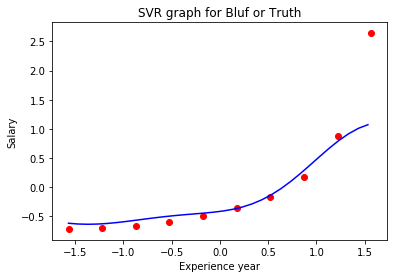

In [12]:
#visualize the SVR dataset
Xgrid= np.arange(min(X), max(X),0.1)
Xgrid=Xgrid.reshape(len(Xgrid),1)
plt.scatter(X, y,color= 'red')     #ceo in the outlier in this model
plt.plot(Xgrid, regressor.predict(Xgrid), color='blue')
plt.title("SVR graph for Bluf or Truth")
plt.xlabel("Experience year")
plt.ylabel("Salary")
plt.show()